<a href="https://colab.research.google.com/github/AKumar098/Ak_Project/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
 4   Class      748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB

First 5 Rows:
    Recency  Frequency  Monetary  Time  Class
0        2         50     12500    99      1
1        0         13      3250    28      1
2        1         17      4000    36      1
3        2         20      5000    45      1
4        1         24      6000    77      0

Summary Statistics:
           Recency   Frequency      Monetary        Time       Class
count  748.000000  748.000000    748.000000  748.000000  748.000000
mean     9.506684    5.516043   1378.676471   34.284759    0.237968
std      8.095396    5.841825   1459.826781   24.380307    0.426

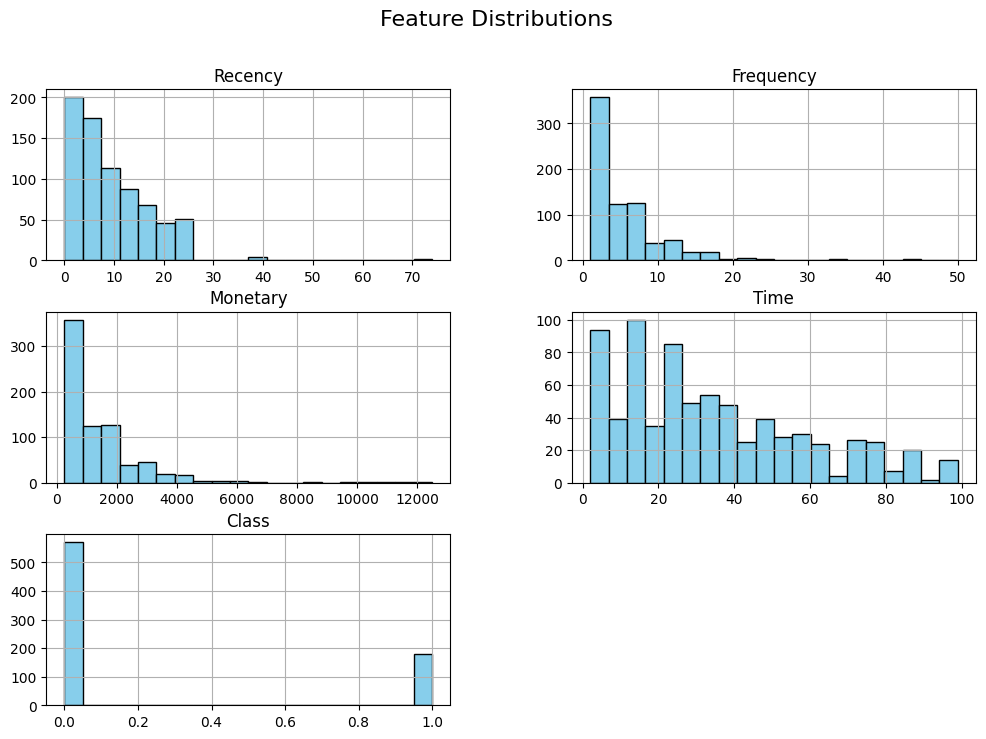

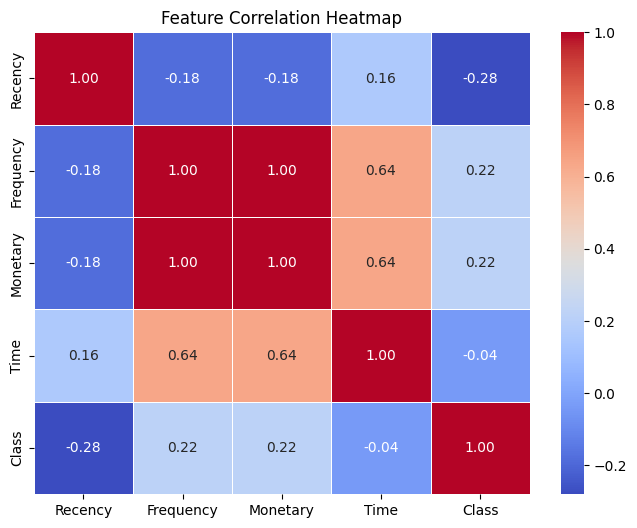

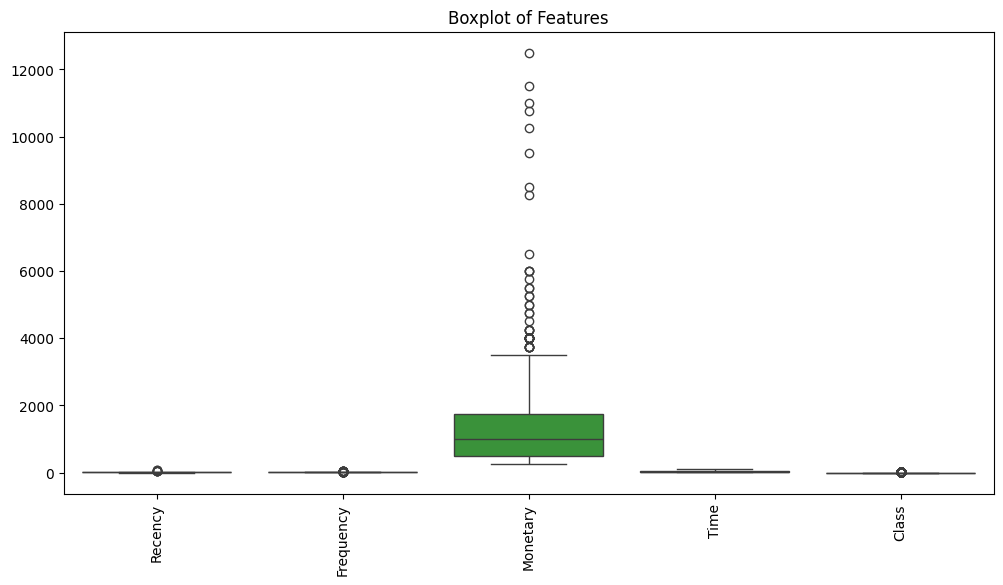

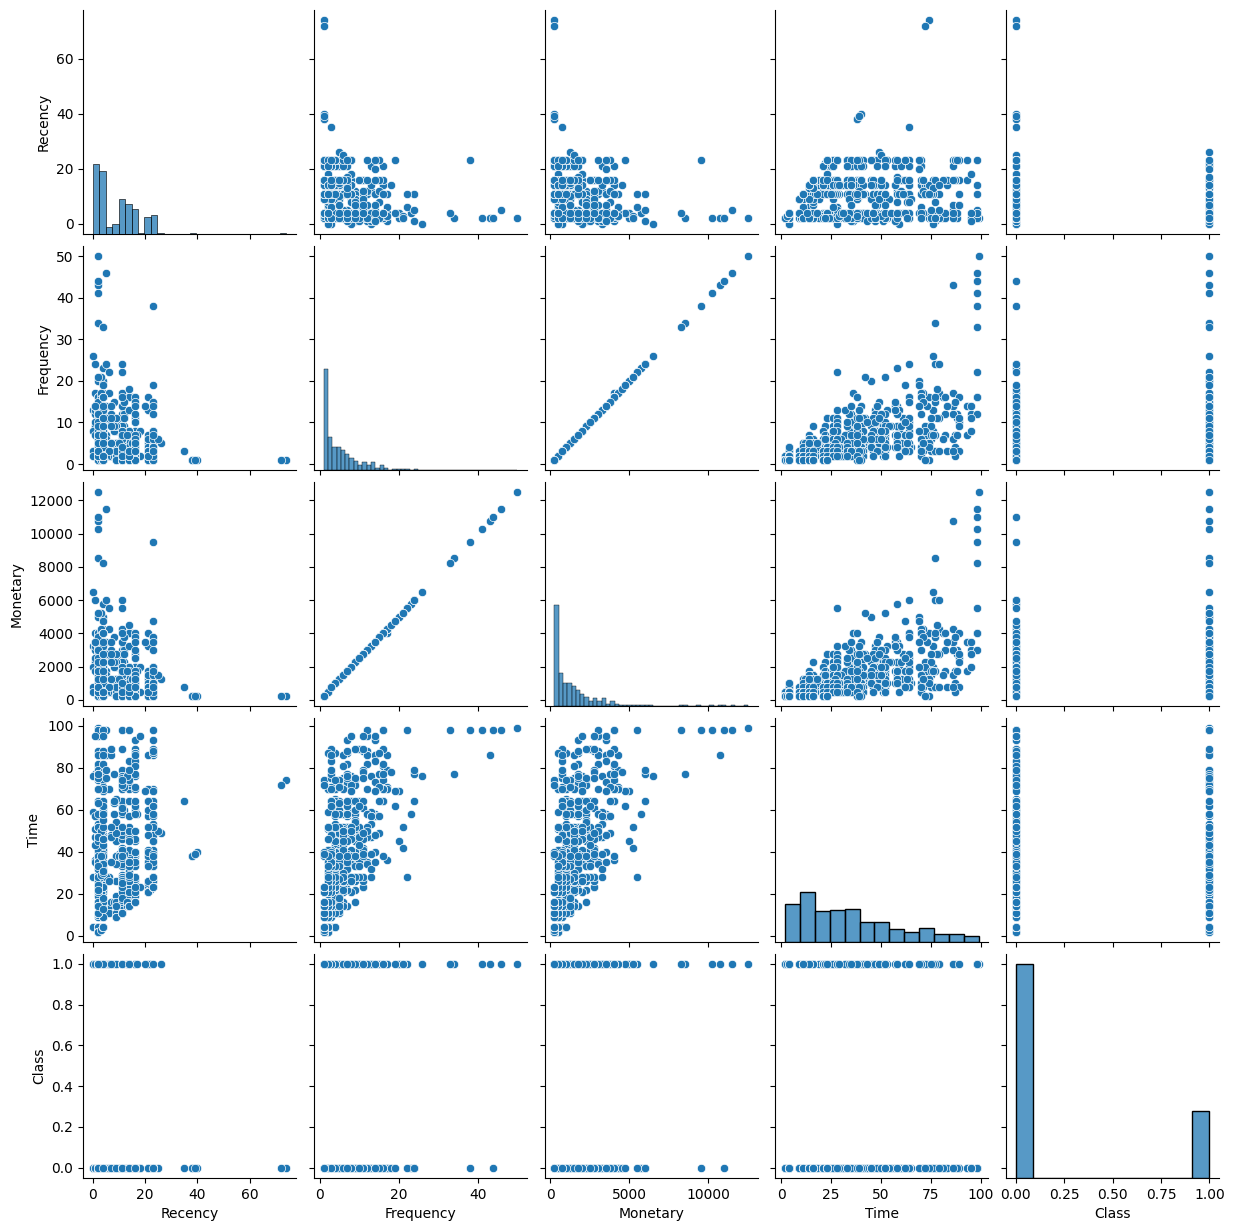

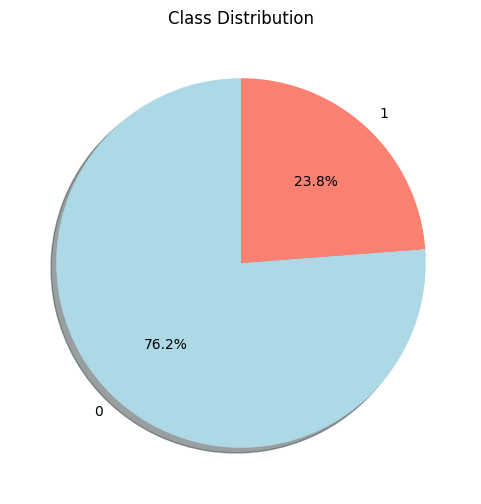


Model Accuracy: 0.72

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.82       113
           1       0.39      0.24      0.30        37

    accuracy                           0.72       150
   macro avg       0.59      0.56      0.56       150
weighted avg       0.68      0.72      0.70       150


Personalized Healthcare Recommendation: Low-risk patient: Maintain a healthy lifestyle and regular checkups.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv("healthcare_data.csv")

# Display basic info and first few rows
print("Dataset Info:\n")
df.info()
print("\nFirst 5 Rows:\n", df.head())

# Handle missing values (if any)
df.fillna(df.median(), inplace=True)

# Summary statistics
print("\nSummary Statistics:\n", df.describe())

# Distribution of features
df.hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Boxplot to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.title("Boxplot of Features")
plt.xticks(rotation=90)
plt.show()

# Pairplot to observe relationships
sns.pairplot(df.select_dtypes(include=['number']))
plt.show()

# Class distribution pie chart
plt.figure(figsize=(6, 6))
df['Class'].value_counts().plot.pie(autopct="%1.1f%%", colors=["lightblue", "salmon"], startangle=90, shadow=True)
plt.title("Class Distribution")
plt.ylabel("")
plt.show()

# Splitting data into features and target
X = df.drop(columns=['Class'])  # Assuming 'Class' is the target variable
y = df['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Generating Personalized Healthcare Recommendations
def generate_recommendations(features):
    features = features.reshape(1, -1)  # Ensure proper input shape
    prediction = model.predict(features)
    return "High-risk patient: Frequent checkups, medication adherence, and lifestyle changes." if prediction[0] == 1 else "Low-risk patient: Maintain a healthy lifestyle and regular checkups."

# Example Usage (Replace with real patient data)
sample_patient = X_test.iloc[0]  # Taking the first test sample
recommendation = generate_recommendations(sample_patient.values)
print("\nPersonalized Healthcare Recommendation:", recommendation)